# K-means (Base Iris)

## 1 - Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import seaborn as sns
from matplotlib import pyplot as plt

from pprint import pprint

## 2 - Carregamento e pré-processamento da base de dados

In [2]:
dataframe = pd.read_csv("dataset/iris.csv")
dataframe_without_target = dataframe.drop(["target"], axis=1)

In [25]:
np.unique(dataframe["target"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
dataframe.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dataframe_without_target.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
dataframe_without_target.describe()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3 - Visualização dos dados

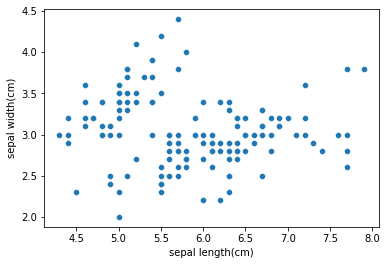

In [20]:
sns.scatterplot(
    x=dataframe_without_target["sepal length(cm)"], 
    y=dataframe_without_target["sepal width(cm)"],
)

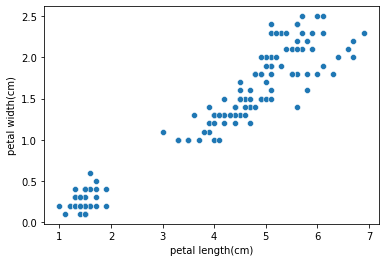

In [21]:
sns.scatterplot(
    x=dataframe_without_target["petal length(cm)"], 
    y=dataframe_without_target["petal width(cm)"],
)

## 4 - Rodando o algoritmo de clusterização K-means

In [22]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(dataframe_without_target)
print(f"Labels do k-means: {kmeans.labels_}")
print(f"Centróides do k-means:\n{kmeans.cluster_centers_}")

Labels do k-means: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Centróides do k-means:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## 5 - Visualizando os resultados

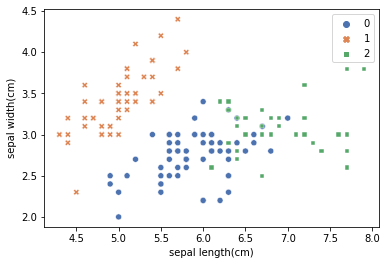

In [24]:
sns.scatterplot(
    x=dataframe_without_target["sepal length(cm)"], 
    y=dataframe_without_target["sepal width(cm)"],
    hue=kmeans.labels_,
    style=kmeans.labels_,
    palette="deep",
)

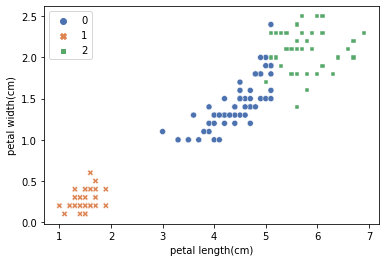

In [23]:
sns.scatterplot(
    x=dataframe_without_target["petal length(cm)"], 
    y=dataframe_without_target["petal width(cm)"],
    hue=kmeans.labels_,
    style=kmeans.labels_,
    palette="deep",
)

## 6 - Checando se o agrupamento realizado está correto

In [26]:
dataframe_labels_0 = dataframe[kmeans.labels_ == 0]
dataframe_labels_1 = dataframe[kmeans.labels_ == 1]
dataframe_labels_2 = dataframe[kmeans.labels_ == 2]

flower_types_per_label = {
    "label 0": np.unique(dataframe_labels_0["target"]).tolist(),
    "label 1": np.unique(dataframe_labels_1["target"]).tolist(),
    "label 2": np.unique(dataframe_labels_2["target"]).tolist(),
}
amount_of_flower_types_per_label = {
    "label 0": {
        "setosa": len(dataframe_labels_0[dataframe_labels_0["target"] == "setosa"]),
        "versicolor": len(dataframe_labels_0[dataframe_labels_0["target"] == "versicolor"]),
        "virginica": len(dataframe_labels_0[dataframe_labels_0["target"] == "virginica"]),
    },
    "label 1": {
        "setosa": len(dataframe_labels_1[dataframe_labels_1["target"] == "setosa"]),
        "versicolor": len(dataframe_labels_1[dataframe_labels_1["target"] == "versicolor"]),
        "virginica": len(dataframe_labels_1[dataframe_labels_1["target"] == "virginica"]),
    },
    "label 2": {
        "setosa": len(dataframe_labels_2[dataframe_labels_2["target"] == "setosa"]),
        "versicolor": len(dataframe_labels_2[dataframe_labels_2["target"] == "versicolor"]),
        "virginica": len(dataframe_labels_2[dataframe_labels_2["target"] == "virginica"]),
    },
}

print("Tipo de flor por label (agrupamento do kmeans):")
pprint(flower_types_per_label)
print("Quantidade de flor por tipo e por label (agrupamento do kmeans):")
pprint(amount_of_flower_types_per_label)

Tipo de flor por label (agrupamento do kmeans):
{'label 0': ['versicolor', 'virginica'],
 'label 1': ['setosa'],
 'label 2': ['versicolor', 'virginica']}
Quantidade de flor por tipo e por label (agrupamento do kmeans):
{'label 0': {'setosa': 0, 'versicolor': 48, 'virginica': 14},
 'label 1': {'setosa': 50, 'versicolor': 0, 'virginica': 0},
 'label 2': {'setosa': 0, 'versicolor': 2, 'virginica': 36}}
